# Statistics Python

Conjunto de Dados/Datasets: <br/>
[Dados.gov.br](https://dados.gov.br/dados/conjuntos-dados/utilizacao-da-frota) <br/>
[UFV - Requisições de transporte - 2016](https://dados.ufv.br/dataset/utilizacao-da-frota-ufv/resource/5f06948a-ffff-49ac-896d-b72362e098d6) <br/>
[UFV- Requisições de transporte - 2017](https://dados.ufv.br/dataset/utilizacao-da-frota-ufv/resource/9e3f3dfc-c67e-407c-b9fc-6fe27ac7f480)

Agradecimentos/Thanks: <br/>
[Estatística para Análise de Dados com Python - Udemy](https://www.udemy.com/course/estatistica-para-analise-de-dados-com-python)<br>
[ChatGPT](https://chat.openai.com)<br/>
[Google Colab AI](https://colab.research.google.com)<br/>
[Plotly](https://plotly.com/python/)

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats

## Unindo dados/Merging Data

In [ ]:
df = pd.read_csv('/content/rqt-finalizada01_01_2016-31_12_2016.csv', sep=',')

In [ ]:
df2 = pd.read_csv('/content/rqt-finalizada01_01_2017-31_12_2017.csv', sep=',')

In [ ]:
df = pd.concat([df, df2], axis=0)

In [ ]:
df.to_csv('merged_rqt.csv', index=False)

## Processamento dos dados/Data processing

In [ ]:
df = pd.read_csv('/content/merged_rqt.csv', sep=',')

In [ ]:
df = df.drop(columns=['Nº Convênio','Motorista','Placa Veículo', 'Finalidade'], )

In [ ]:
df['Custo Real'] = df['Custo Real'].str.replace(',', '.').astype(float);
df['Custo Estimado'] = df['Custo Estimado'].str.replace(',', '.').astype(float);

In [ ]:
df.head(5)

,Nº RQT,Compartilhada,Cod. Gestora,Gestora,Fonte Recurso,Sigla Departamento,Tipo,Origem,Destino,Data Saída,...,Data Retorno,Hora Retorno,KM Estimada,KM Real,Tipo Transporte,Veículo,Ano Veículo,Custo Estimado,Custo Real,Passageiros
0,4158,Não,1000,REITORIA,Recurso da União,CCS,1,Coordenadoria de Comunicação Social,Edificio Fabio Ribeiro Gomes,20/09/2016,...,20/09/2016,11:30,10.0,19,Carga,158,2006.0,36.98,32.47,NaN
1,5061,Não,1000,REITORIA,Recurso da União,CCS,1,Departamento de Geografia,Sistema de Rádio e Televisão,04/11/2016,...,04/11/2016,11:00,8.0,3,Carga,173,2009.0,15.98,9.76,NaN
2,900,Não,1000,REITORIA,Recurso da União,CCS,1,Sistema de Rádio e Televisão,Campus Viçosa,01/01/2016,...,29/02/2016,23:00,10.0,252,Passageiro,PARATI /725,2004.0,9.43,237.38,NaN
3,901,Não,1000,REITORIA,Recurso da União,CCS,1,Sistema de Rádio e Televisão,Campus Viçosa,01/01/2016,...,29/02/2016,23:00,10.0,542,Passageiro,746,2008.0,9.43,510.56,NaN
4,355,Não,1000,REITORIA,Recurso da União,CCS,1,Viçosa,Coordenadoria de Comunicação Social,01/03/2016,...,30/04/2016,23:00,10.0,631,Passageiro,PARATI /725,2004.0,9.43,594.40,NaN


In [ ]:
df.shape

(6963, 21)

In [ ]:
df.dtypes

Nº RQT                  int64
Compartilhada          object
Cod. Gestora            int64
Gestora                object
Fonte Recurso          object
Sigla Departamento     object
Tipo                    int64
Origem                 object
Destino                object
Data Saída             object
Hora Saída             object
Data Retorno           object
Hora Retorno           object
KM Estimada           float64
KM Real                 int64
Tipo Transporte        object
Veículo                object
Ano Veículo           float64
Custo Estimado        float64
Custo Real            float64
Passageiros           float64
dtype: object

In [ ]:
#df['Ano Veículo']
df['Ano Veículo'].fillna(0, inplace=True)
df['Ano Veículo'] = df['Ano Veículo'].astype('int64')

In [ ]:
#lines without value
df['Passageiros'].isnull().sum()

2420

In [ ]:
df['Tipo'].unique()
#df['Tipo'].value_counts()['5']
df['Tipo'].value_counts()

Tipo
1    4270
2    1816
5     877
Name: count, dtype: int64

In [ ]:
df_test_tipo5 = df[df['Tipo'] == 5]
df_test_tipo5.head()

,Nº RQT,Compartilhada,Cod. Gestora,Gestora,Fonte Recurso,Sigla Departamento,Tipo,Origem,Destino,Data Saída,...,Data Retorno,Hora Retorno,KM Estimada,KM Real,Tipo Transporte,Veículo,Ano Veículo,Custo Estimado,Custo Real,Passageiros
2110,91,Não,1000,REITORIA,Recurso da União,CEA,5,Viçosa,Jaboticatubas,11/03/2016,...,NaN,NaN,NaN,633,NaN,Automóvel,0,0.0,715.29,1.0
2111,311,Não,1000,REITORIA,Recurso da União,CEA,5,Viçosa,Jaboticatubas,18/03/2016,...,NaN,NaN,NaN,625,NaN,Automóvel,0,0.0,706.25,1.0
2112,484,Não,1000,REITORIA,Recurso da União,CEA,5,Viçosa,Ipanema,01/04/2016,...,NaN,NaN,NaN,538,NaN,Automóvel,0,0.0,607.94,3.0
2113,489,Não,1000,REITORIA,Recurso da União,CEA,5,Viçosa,Timotéo,01/04/2016,...,NaN,NaN,NaN,507,NaN,Automóvel,0,0.0,572.91,3.0
2114,538,Não,1000,REITORIA,Recurso da União,CEA,5,Viçosa,Jaboticatubas,01/04/2016,...,NaN,NaN,NaN,708,NaN,Automóvel,0,0.0,800.04,3.0


# Métodos de amostragem/Sampling Methods

## Amostragem aleatória Simples/Simple random sampling

In [ ]:
np.random.seed(8)
sample1 = df.sample(frac=0.10)

In [ ]:
df.shape,sample1.shape

((6963, 21), (696, 21))

In [ ]:
sample1.head(5)

,Nº RQT,Compartilhada,Cod. Gestora,Gestora,Fonte Recurso,Sigla Departamento,Tipo,Origem,Destino,Data Saída,...,Data Retorno,Hora Retorno,KM Estimada,KM Real,Tipo Transporte,Veículo,Ano Veículo,Custo Estimado,Custo Real,Passageiros
6003,1409,Não,7000,CCE - CENTRO DE CIêNCIAS EXATAS,Recurso da União,DEC,1,Lesa,Bovinocultura de Leite,28/03/2017,...,28/03/2017,14:00,10.0,10,Carga,173,2009,"32,54","32,54",NaN
2651,2530,Não,1000,REITORIA,Recurso da União,CTV,2,Belo Horizonte,Viçosa,15/05/2017,...,15/05/2017,NaN,476.0,476,Passageiro,792,2013,"448,87","448,39",1.0
2664,400,Não,1000,REITORIA,Recurso da União,CTV,2,Viçosa,Belo Horizonte,20/02/2017,...,20/02/2017,19:00,476.0,461,Passageiro,792,2013,"448,87","434,26",NaN
4653,2586,Não,5000,CCA - CENTRO DE CIêNCIAS AGRáRIAS,Recurso da União,DPS,1,Estacionamento Biologia/Estufas,Equideocultura,08/06/2017,...,08/06/2017,10:00,6.0,12,Passageiro,170,2009,"36,17","20,51",16.0
2269,5257,Não,3690,PROGRAMA DE EXTENSãO UNIVERSITáRIA - PROEXT,PROEXT,DPE,5,Goianá,Viçosa,09/11/2016,...,NaN,NaN,NaN,632,NaN,Automóvel,0,0,"796,32",2.0


## Amostragem sistemática/Systematic sampling

In [ ]:
np.random.seed(88)
start = np.random.randint(1, 10, 1)
step = np.random.randint(10, 30, 1)
start,step

(array([9]), array([10]))

In [ ]:
sample2 = np.arange(start,df.shape[0],step)
#sample2

In [ ]:
sample2 = df.iloc[sample2,:]
sample2.shape

(696, 21)

In [ ]:
sample2.head(5)

,Nº RQT,Compartilhada,Cod. Gestora,Gestora,Fonte Recurso,Sigla Departamento,Tipo,Origem,Destino,Data Saída,...,Data Retorno,Hora Retorno,KM Estimada,KM Real,Tipo Transporte,Veículo,Ano Veículo,Custo Estimado,Custo Real,Passageiros
9,148,Não,1000,REITORIA,Recurso da União,CTV,1,4 Pilastras - UFV,CENTEV,11/03/2016,...,30/11/1999,NaN,10.0,37,Passageiro,788,2007,"9,43","41,82",NaN
19,4979,Não,1000,REITORIA,Recurso da União,CTV,1,Centro de Vivência,CENTEV,01/11/2016,...,01/12/2001,16.00,8.0,19,Carga,SPRINTER /148,1998,"13,67","32,47",NaN
29,4100,Não,1000,REITORIA,Recurso da União,RTR,1,Restaurante Universitário - RU,Horta Velha,21/09/2016,...,21/09/2016,18:00,6.0,12,Passageiro,178,2012,"36,17","72,34",26.0
39,5868,Não,1000,REITORIA,Recurso da União,CCS,2,Viçosa,Belo Horizonte,15/12/2016,...,15/12/2016,18:00,476.0,454,Passageiro,182,2012,"813,48","775,89",NaN
49,3894,Não,1000,REITORIA,Recurso da União,CTV,2,Viçosa,Confins,03/09/2016,...,03/09/2016,05:20,560.0,552,Passageiro,792,2013,"528,08","519,98",NaN


## Amostragem estratificada/Stratified Sampling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df['Tipo Transporte'].unique()

array(['Carga', 'Passageiro', 'Passageiro e Carga', nan], dtype=object)

In [ ]:
df_sample3 = df[df['Tipo Transporte'].notna()]
df_sample3['Tipo Transporte'].unique()

array(['Carga', 'Passageiro', 'Passageiro e Carga'], dtype=object)

In [ ]:
X_train, X_test, _, _ = train_test_split(df_sample3, df_sample3['Tipo Transporte'], test_size=0.1, random_state=1, stratify=df_sample3['Tipo Transporte'])

sample3 = X_test
sample3.shape, X_train.shape

((609, 21), (5477, 21))

## Amostragem por conglomerado/Clustered Sampling

In [ ]:
df['Gestora'].unique()

array(['REITORIA', 'PRO-REITORIA DE PLANEJAMENTO E ORçAMENTO',
       'PROGRAMA DE FORMAçãO CONTINUADA - AçãO 20RJ',
       'PRO-REITORIA DE GESTãO DE PESSOAS',
       'PRO-REITORIA DE ADMINISTRAçãO', 'PAD - OBRAS',
       'PRO-REITORIA DE ENSINO',
       'PRO-REITORIA DE PESQUISA E POS-GRADUAçãO',
       'BIOAGRO - INST. DE BIOTEC.. APLIC. A AGROPECUARIA',
       'PRO-REITORIA DE EXTENSãO E CULTURA',
       'PROGRAMA DE EXTENSãO UNIVERSITáRIA - PROEXT',
       'COLéGIO DE APLICAçãO', 'PRO-REITORIA DE ASSUNTOS COMUNITáRIOS',
       'RESTAURANTE UNIVERSITáRIO', 'CCA - CENTRO DE CIêNCIAS AGRáRIAS',
       'CCB - CENTRO DE CIêNCIAS BIOLóGICAS',
       'CCE - CENTRO DE CIêNCIAS EXATAS',
       'CCH - CENTRO DE CIêNCIAS HUMANAS',
       'GARAGEM - UTILIZAçãO DE VEíCULOS'], dtype=object)

In [ ]:
df['Gestora'].value_counts()

CCA - CENTRO DE CIêNCIAS AGRáRIAS                    2209
CCB - CENTRO DE CIêNCIAS BIOLóGICAS                  1415
CCE - CENTRO DE CIêNCIAS EXATAS                       592
CCH - CENTRO DE CIêNCIAS HUMANAS                      575
REITORIA                                              489
PAD - OBRAS                                           443
PROGRAMA DE EXTENSãO UNIVERSITáRIA - PROEXT           349
PRO-REITORIA DE ADMINISTRAçãO                         246
PRO-REITORIA DE EXTENSãO E CULTURA                    236
PRO-REITORIA DE PLANEJAMENTO E ORçAMENTO               70
PRO-REITORIA DE ENSINO                                 69
PRO-REITORIA DE ASSUNTOS COMUNITáRIOS                  57
PROGRAMA DE FORMAçãO CONTINUADA - AçãO 20RJ            47
PRO-REITORIA DE PESQUISA E POS-GRADUAçãO               45
PRO-REITORIA DE GESTãO DE PESSOAS                      43
COLéGIO DE APLICAçãO                                   42
RESTAURANTE UNIVERSITáRIO                              21
BIOAGRO - INST

In [ ]:
df_sample4 = df[df['Gestora'] == 'REITORIA']
df_sample4.head(5)

,Nº RQT,Compartilhada,Cod. Gestora,Gestora,Fonte Recurso,Sigla Departamento,Tipo,Origem,Destino,Data Saída,...,Data Retorno,Hora Retorno,KM Estimada,KM Real,Tipo Transporte,Veículo,Ano Veículo,Custo Estimado,Custo Real,Passageiros
0,4158,Não,1000,REITORIA,Recurso da União,CCS,1,Coordenadoria de Comunicação Social,Edificio Fabio Ribeiro Gomes,20/09/2016,...,20/09/2016,11:30,10.0,19,Carga,158,2006,"36,98","32,47",NaN
1,5061,Não,1000,REITORIA,Recurso da União,CCS,1,Departamento de Geografia,Sistema de Rádio e Televisão,04/11/2016,...,04/11/2016,11:00,8.0,3,Carga,173,2009,"15,98","9,76",NaN
2,900,Não,1000,REITORIA,Recurso da União,CCS,1,Sistema de Rádio e Televisão,Campus Viçosa,01/01/2016,...,29/02/2016,23:00,10.0,252,Passageiro,PARATI /725,2004,"9,43","237,38",NaN
3,901,Não,1000,REITORIA,Recurso da União,CCS,1,Sistema de Rádio e Televisão,Campus Viçosa,01/01/2016,...,29/02/2016,23:00,10.0,542,Passageiro,746,2008,"9,43","510,56",NaN
4,355,Não,1000,REITORIA,Recurso da União,CCS,1,Viçosa,Coordenadoria de Comunicação Social,01/03/2016,...,30/04/2016,23:00,10.0,631,Passageiro,PARATI /725,2004,"9,43","594,4",NaN


In [ ]:
sample4_index = df_sample4['Sigla Departamento'].value_counts()
sample4_index

RTR    126
CTV    110
DRI     93
CCS     53
GAB     40
CEA     28
PRJ     17
SOC     14
IPP      4
PAD      2
RTV      1
AIN      1
Name: Sigla Departamento, dtype: int64

In [ ]:
sample4 = np.random.choice(a=[0,1],size=12, replace=True, p=[0.7, 0.3])
sample4

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
sample4 = sample4_index.loc[sample4 == 1]
sample4

DRI    93
CEA    28
SOC    14
PAD     2
AIN     1
Name: Sigla Departamento, dtype: int64

In [ ]:
sample4.index

Index(['DRI', 'CEA', 'SOC', 'PAD', 'AIN'], dtype='object')

In [ ]:
sample4 = df_sample4.loc[df_sample4['Sigla Departamento'].isin(['DRI', 'CEA', 'SOC', 'PAD', 'AIN'])]

In [ ]:
sample4.head()

,Nº RQT,Compartilhada,Cod. Gestora,Gestora,Fonte Recurso,Sigla Departamento,Tipo,Origem,Destino,Data Saída,...,Data Retorno,Hora Retorno,KM Estimada,KM Real,Tipo Transporte,Veículo,Ano Veículo,Custo Estimado,Custo Real,Passageiros
22,2111,Não,1000,REITORIA,Recurso da União,DRI,1,4 Pilastras - UFV,Zona Urbana,14/06/2016,...,14/06/2016,12:00,6.0,60,Passageiro,170,2009,"10,25","102,54",NaN
23,3796,Não,1000,REITORIA,Recurso da União,DRI,1,Diretoria de Material,Prédio Principal,30/08/2016,...,30/08/2016,NaN,8.0,3,Carga,SPRINTER /148,1998,"15,98","5,13",NaN
24,2108,Não,1000,REITORIA,Recurso da União,DRI,1,Zona Urbana,Reitoria,13/06/2016,...,13/06/2016,18:00,10.0,25,Passageiro,182,2012,"17,09","42,73",NaN
33,3890,Não,1000,REITORIA,Recurso da União,AIN,2,Viçosa,Belo Horizonte,23/09/2016,...,23/09/2016,15:00,476.0,481,Passageiro,773,2012,"448,87","453,1",NaN
41,3472,Não,1000,REITORIA,Recurso da União,CEA,2,Viçosa,Confins,01/09/2016,...,01/09/2016,22:00,560.0,545,Passageiro,778,2012,"528,08","513,39",NaN


# Distribuição de Frequências/Frequency Distribution

In [ ]:
from collections import Counter

In [ ]:
df_f = df[~df['Passageiros'].isna() & (df['Passageiros'] > 0)]

In [ ]:
df_f.shape

(4514, 21)

In [ ]:
abs_f = Counter(df_f['Passageiros'])

In [ ]:
abs_f = pd.DataFrame.from_dict(abs_f, orient='index')

In [ ]:
abs_f = abs_f.sort_index(ascending=True)

In [ ]:
rel_f = abs_f/abs_f.sum() * 100
#rel_f

In [ ]:
rel_f.sum()

0    100.0
dtype: float64

# Histograma / Histogram

In [ ]:
df_hist = df[df['KM Estimada'].notna()]
df_hist2 = df[df['Passageiros'].notna()]

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_hist['KM Estimada'].unique()

array([  10.,    8.,    6.,   18.,  476.,  232.,  562.,  560.,  310.,
        340.,  740.,  100.,   40.,  462.,  202., 1078.,   88.,  346.,
        102.,   94.,    4.,  260.,  880.,   14.,   20.,   36.,  672.,
        554.,   16., 1286.,  660., 1032.,  108.,   70.,   52.,   46.,
        164.,  254.,  724., 1790.,   24.,   48.,   12.,  532.,  326.,
        308.,  128.,  156.,  192.,  480.,  466.,   64.,  146.,  286.,
         30.,  546.,  198.,  180.,  138.,  130.,  200.,  804.,  640.,
        402.,  550.,  496.,    2.,  544.,  614.,  360., 1068.,  144.,
        266., 1280.,  680., 1508., 1402.,  522.,  428.,  300.,   50.,
        114.,   60.,  838.,  580.,  350.,  424.,  594.,  344.,  506.,
        946.,  584.,  474.,  414.,  206.,  252.,  758.,  780.,  348.,
        296., 1120.])

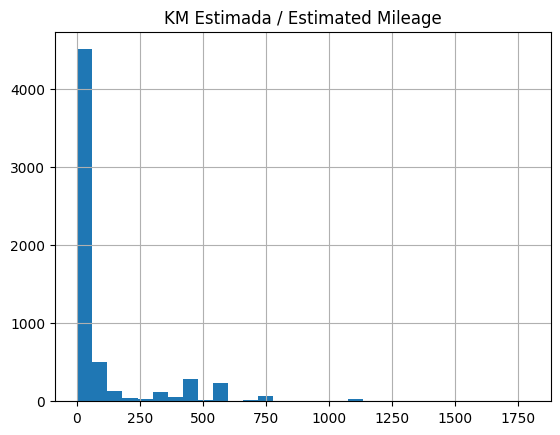

In [ ]:
df_hist['KM Estimada'].hist(bins=30);
plt.title('KM Estimada / Estimated Mileage')
plt.show()

## Seaborn

In [ ]:
import seaborn as sns

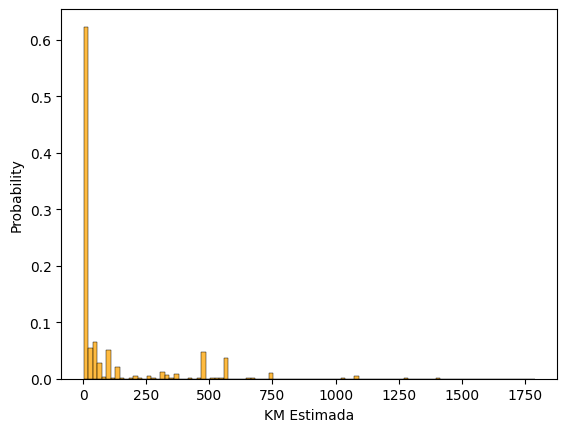

In [ ]:
sns.histplot(df_hist, x='KM Estimada', bins=100, color="orange", kde=False, stat="probability");

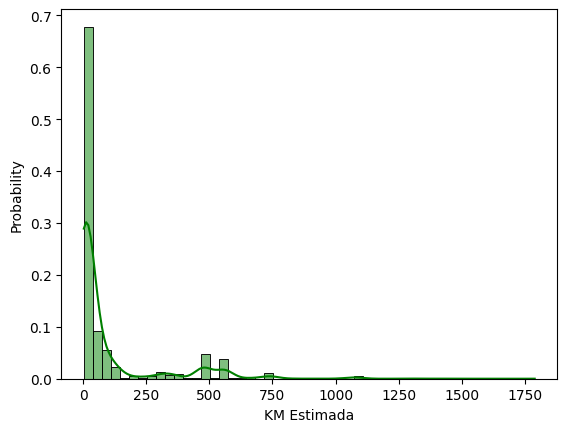

In [ ]:
sns.histplot(df_hist, x='KM Estimada', bins=50, color="green", kde=True, stat="probability");

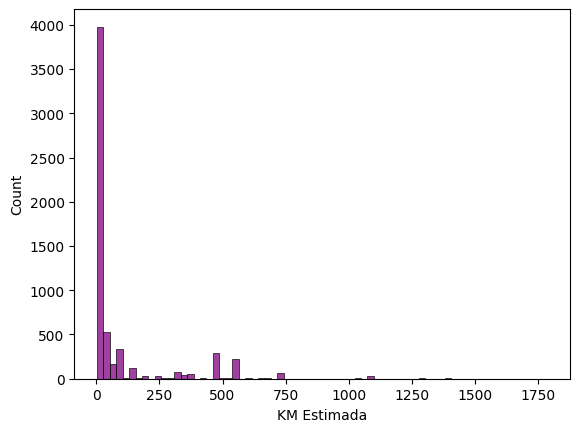

In [ ]:
sns.histplot(df_hist, x='KM Estimada', bins=70, color="purple", kde=False, stat="count");

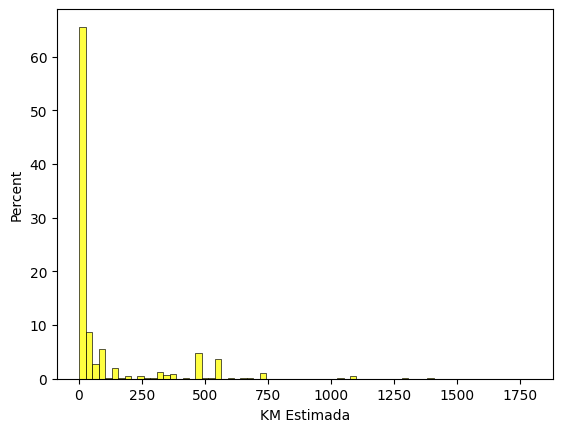

In [ ]:
sns.histplot(df_hist, x='KM Estimada', bins=70, color="yellow", kde=False, stat="percent");

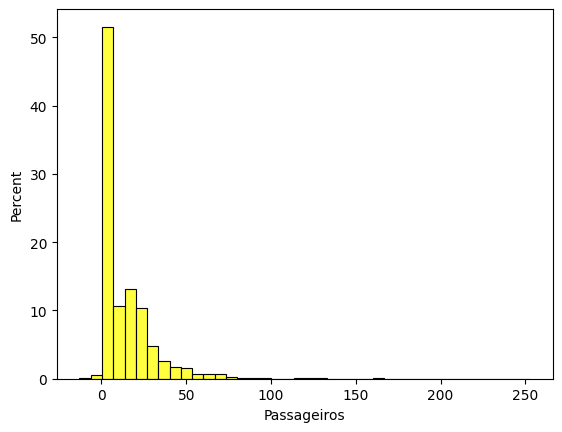

In [ ]:
sns.histplot(df_hist2, x='Passageiros', bins=40, color="yellow", kde=False, stat="percent");

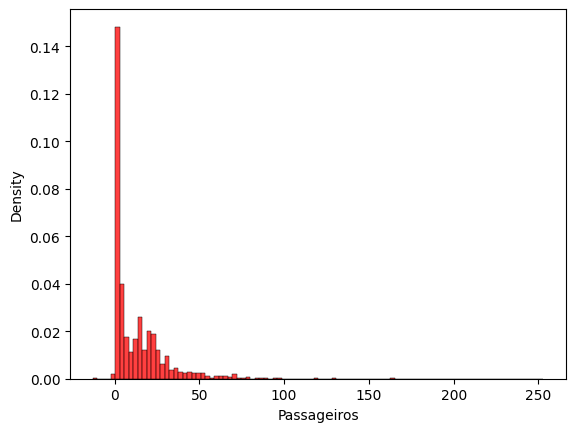

In [ ]:
sns.histplot(df_hist2, x='Passageiros', bins=100, color="red", kde=False, stat="density");

## Plotly

In [ ]:
import plotly.express as px

In [ ]:
plot =  px.histogram (df_hist2,  x = "Passageiros", nbins=30, histnorm='probability',)
plot.update_layout(width=700,height=700,title_text='Passageiros por Frota 2016 & 2017 / Passengers per Fleet 2016 & 2017')
plot.show()

In [ ]:
df_hist2.columns

Index(['Nº RQT', 'Compartilhada', 'Cod. Gestora', 'Gestora', 'Fonte Recurso',
       'Sigla Departamento', 'Tipo', 'Origem', 'Destino', 'Data Saída',
       'Hora Saída', 'Data Retorno', 'Hora Retorno', 'KM Estimada', 'KM Real',
       'Tipo Transporte', 'Veículo', 'Ano Veículo', 'Custo Estimado',
       'Custo Real', 'Passageiros'],
      dtype='object')

In [ ]:
df_hist2['Tipo Transporte'].unique()

array(['Passageiro', 'Passageiro e Carga', nan], dtype=object)

In [ ]:
plot =  px.histogram (df_hist2,  x = "Passageiros", nbins=30, histnorm='density', color='Tipo Transporte')
plot.update_layout(width=700,height=700,title_text='Passageiros por Frota 2016 & 2017 / Passengers per Fleet 2016 & 2017')
plot.show()

# Medidas de tendência central / Measures of central tendency

In [ ]:
df_ct = df[df['Passageiros'].notna()]

In [ ]:
df.describe()

,Nº RQT,Cod. Gestora,Tipo,KM Estimada,KM Real,Ano Veículo,Passageiros
count,6963.000000,6963.000000,6963.000000,6065.000000,6963.000000,6963.000000,4543.000000
mean,3470.086457,4799.387764,1.764613,97.416653,238.688927,1754.506678,12.865727
std,1825.093952,1941.142098,1.300631,194.007836,479.986620,667.829411,17.437238
min,1.000000,1000.000000,1.000000,2.000000,1.000000,0.000000,-13.000000
25%,1997.500000,3690.000000,1.000000,6.000000,13.000000,2006.000000,1.000000
50%,3617.000000,5000.000000,1.000000,10.000000,40.000000,2009.000000,5.000000
75%,4908.000000,6000.000000,2.000000,64.000000,346.500000,2012.000000,20.000000
max,7000.000000,8000.000000,5.000000,1790.000000,11929.000000,2016.000000,253.000000


In [ ]:
df_ct.describe()

,Nº RQT,Cod. Gestora,Tipo,KM Estimada,KM Real,Ano Veículo,Passageiros
count,4543.000000,4543.000000,4543.000000,3665.000000,4543.000000,4543.000000,4543.000000
mean,3710.741801,4919.340524,1.953115,80.464939,213.137354,1620.712745,12.865727
std,1707.231958,1814.621887,1.536795,175.262598,369.601780,793.360399,17.437238
min,1.000000,1000.000000,1.000000,2.000000,1.000000,0.000000,-13.000000
25%,2533.000000,3800.000000,1.000000,6.000000,14.000000,2001.000000,1.000000
50%,3866.000000,5000.000000,1.000000,10.000000,35.000000,2009.000000,5.000000
75%,5026.500000,6000.000000,2.000000,40.000000,324.000000,2012.000000,20.000000
max,7000.000000,8000.000000,5.000000,1286.000000,5506.000000,2016.000000,253.000000


In [ ]:
def central_tendency(column):
  print(
  f'''
Mean: {round(column.mean(),2)}
Median: {column.median()}
Mode: {column.mode()[0]}
  ''')

In [ ]:
central_tendency(df['KM Estimada'])


Mean: 97.42 
Median: 10.0 
Mode: 6.0
  


In [ ]:
central_tendency(df['Passageiros'])


Mean: 12.87 
Median: 5.0 
Mode: 1.0
  


In [ ]:
plot =  px.histogram (df,  x = "KM Estimada", nbins=250)
plot.show()

In [ ]:
plot =  px.histogram (df,  x = "Passageiros", nbins=250)
plot.update_layout(width=700,height=700,title_text='Passageiros por Frota 2016 & 2017 / Passengers per Fleet 2016 & 2017')
plot.show()

In [ ]:
df['Passageiros'].min(), df['KM Estimada'].min()

(-13.0, 2.0)

In [ ]:
df['Passageiros'].max(), df['KM Estimada'].max()

(253.0, 1790.0)

In [ ]:
df['Passageiros'].quantile(q=0.25),df['KM Estimada'].quantile(q=0.25)

(1.0, 6.0)

In [ ]:
df['Passageiros'].quantile(q=0.5),df['KM Estimada'].quantile(q=0.5)

(5.0, 10.0)

In [ ]:
df['Passageiros'].quantile(q=0.75),df['KM Estimada'].quantile(q=0.75)

(20.0, 64.0)

In [ ]:
df['Passageiros'].quantile(q=0.9),df['KM Estimada'].quantile(q=0.9)

(32.0, 476.0)

In [ ]:
df.describe()

,Nº RQT,Cod. Gestora,Tipo,KM Estimada,KM Real,Ano Veículo,Passageiros
count,6963.000000,6963.000000,6963.000000,6065.000000,6963.000000,6963.000000,4543.000000
mean,3470.086457,4799.387764,1.764613,97.416653,238.688927,1754.506678,12.865727
std,1825.093952,1941.142098,1.300631,194.007836,479.986620,667.829411,17.437238
min,1.000000,1000.000000,1.000000,2.000000,1.000000,0.000000,-13.000000
25%,1997.500000,3690.000000,1.000000,6.000000,13.000000,2006.000000,1.000000
50%,3617.000000,5000.000000,1.000000,10.000000,40.000000,2009.000000,5.000000
75%,4908.000000,6000.000000,2.000000,64.000000,346.500000,2012.000000,20.000000
max,7000.000000,8000.000000,5.000000,1790.000000,11929.000000,2016.000000,253.000000


# Medidas de dispersão / Measures of dispersion

Variância / Variance <br/>
A variância é uma medida estatística que indica o quão dispersos estão os valores de um conjunto de dados em relação à média. <br/>
Variance is a statistical measure that indicates how spread out the values in a dataset are relative to the mean. <br/>
Credits: ChatGPT


In [ ]:
df['Passageiros'].var(), df['KM Estimada'].var()

(304.0572641502942, 37639.04025693509)

Desvio Padrão / Standard Deviation <br/>
O desvio padrão é a raiz quadrada da variância e é expresso na mesma unidade que os dados originais. Em outras palavras, o desvio padrão fornece uma medida de quanto os valores em um conjunto de dados tendem a variar em torno da média. <br/>
The standard deviation is the square root of the variance and is expressed in the same unit as the original data. In other words, the standard deviation provides a measure of how much the values in a dataset tend to vary around the mean. <br/>
Credits: ChatGPT

In [ ]:
df['Passageiros'].std(), df['KM Estimada'].std()

(17.43723785896993, 194.0078355555133)

Desvio Absoluto / Absolute Deviation <br/>
O desvio absoluto mede a distância média dos valores individuais em relação à média do conjunto de dados, sem levar em conta se essas diferenças são positivas ou negativas. <br/>
The absolute deviation measures the average distance of individual values from the mean of the dataset, without considering whether these differences are positive or negative <br/>
Credits: ChatGPT

In [ ]:
def mad(coluna):
    m = coluna.mean()
    mad = np.mean(np.abs(coluna - m))

    return mad
    #Credits:GPT

In [ ]:
#df['Passageiros'].mad()
#mad(df['Passageiros']), mad(df['KM Estimada'])

In [ ]:
df['Passageiros'].mean(), df['KM Estimada'].mean()

(12.865727492846137, 97.41665292662819)

In [ ]:
df['Passageiros'].describe()

count    4543.000000
mean       12.865727
std        17.437238
min       -13.000000
25%         1.000000
50%         5.000000
75%        20.000000
max       253.000000
Name: Passageiros, dtype: float64

In [ ]:
df['KM Estimada'].describe()

count    6065.000000
mean       97.416653
std       194.007836
min         2.000000
25%         6.000000
50%        10.000000
75%        64.000000
max      1790.000000
Name: KM Estimada, dtype: float64

# BoxPlot & Outliers

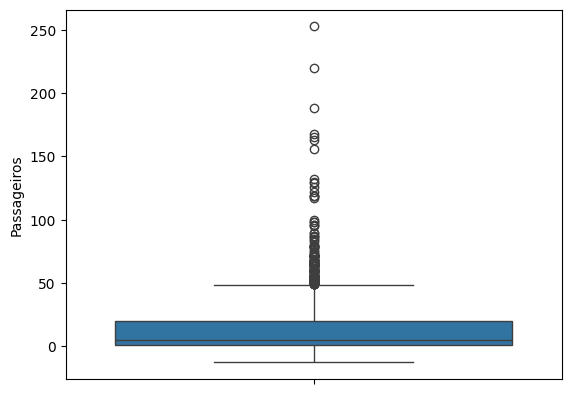

In [ ]:
sns.boxplot(y='Passageiros', data=df);

In [ ]:
df.describe()

,Nº RQT,Cod. Gestora,Tipo,KM Estimada,KM Real,Ano Veículo,Passageiros
count,6963.000000,6963.000000,6963.000000,6065.000000,6963.000000,6963.000000,4543.000000
mean,3470.086457,4799.387764,1.764613,97.416653,238.688927,1754.506678,12.865727
std,1825.093952,1941.142098,1.300631,194.007836,479.986620,667.829411,17.437238
min,1.000000,1000.000000,1.000000,2.000000,1.000000,0.000000,-13.000000
25%,1997.500000,3690.000000,1.000000,6.000000,13.000000,2006.000000,1.000000
50%,3617.000000,5000.000000,1.000000,10.000000,40.000000,2009.000000,5.000000
75%,4908.000000,6000.000000,2.000000,64.000000,346.500000,2012.000000,20.000000
max,7000.000000,8000.000000,5.000000,1790.000000,11929.000000,2016.000000,253.000000


In [ ]:
box = px.box(df, y="Passageiros")
box.show()

In [ ]:
df_p = df[df['Passageiros'] > 0]

In [ ]:
df_p.describe()

,Nº RQT,Cod. Gestora,Tipo,KM Estimada,KM Real,Ano Veículo,Passageiros
count,4514.000000,4514.000000,4514.000000,3638.000000,4514.000000,4514.000000,4514.000000
mean,3704.922685,4920.549402,1.957244,80.667400,213.716881,1619.145326,12.958352
std,1710.211247,1818.016955,1.538684,174.658191,369.903834,794.622545,17.451844
min,1.000000,1000.000000,1.000000,2.000000,1.000000,0.000000,1.000000
25%,2519.750000,3800.000000,1.000000,6.000000,14.000000,2001.000000,1.000000
50%,3856.500000,5000.000000,1.000000,10.000000,35.000000,2009.000000,5.000000
75%,5031.000000,6000.000000,2.000000,40.000000,325.750000,2012.000000,20.000000
max,6927.000000,8000.000000,5.000000,1286.000000,5506.000000,2016.000000,253.000000


In [ ]:
box = px.box(df_p, y="Passageiros")
box.show()

In [ ]:
upper_fence = 48
df_p = df_p[df_p['Passageiros'] <= upper_fence]

In [ ]:
box = px.box(df_p, y="Passageiros")
box.show()

In [ ]:
df_p = df[df['Passageiros'] > 0]

In [ ]:
box = px.box(df_p, y="Passageiros", x = "Tipo Transporte")
box.show()

In [ ]:
box = px.box(df, y="KM Estimada", x = "Tipo Transporte")
box.show()

# Probabilidade / Probability

In [ ]:
def prob(a, t, n=0):
  a = len(a)
  t = len(t)
  p = a/t*100
  p = p if n == 0 else 100 - p
  print(f'{p:.2f}%')

In [ ]:
prob(df[df['Gestora'] == 'REITORIA'],df)

7.02%


In [ ]:
df.columns

Index(['Nº RQT', 'Compartilhada', 'Cod. Gestora', 'Gestora', 'Fonte Recurso',
       'Sigla Departamento', 'Tipo', 'Origem', 'Destino', 'Data Saída',
       'Hora Saída', 'Data Retorno', 'Hora Retorno', 'KM Estimada', 'KM Real',
       'Tipo Transporte', 'Veículo', 'Ano Veículo', 'Custo Estimado',
       'Custo Real', 'Passageiros'],
      dtype='object')

In [ ]:
df['Ano Veículo'].unique()

array([2006, 2009, 2004, 2008, 2011, 2007, 2012, 1998, 2013, 1987, 2010,
       2002, 2000, 1995, 1991, 1982, 1999, 1978, 1997, 2001, 1986, 1984,
       1996, 2005,    0, 1988, 2014, 2016, 1979, 1990])

In [ ]:
prob(df[df['Ano Veículo'] > 2006],df)

71.18%


In [ ]:
prob(df[df['Ano Veículo'] <= 2006],df, n = 1)

71.18%


In [ ]:
prob(df[(df['Ano Veículo'] == 2009) | (df['Ano Veículo'] == 2013)],df, n= 1)

74.13%


In [ ]:
prob(df[(df['Ano Veículo'] == 2009) | (df['Ano Veículo'] == 2013)],df, n= 0)

25.87%


In [ ]:
def prob_u(a,b, t, n=0):
  a, b, t = len(a), len(b), len(t)
  p = (a/t + b/t)*100
  p = p if n == 0 else 100 - p
  print(f'{p:.2f}%')

In [ ]:
prob(df[(df['Ano Veículo'] == 2009) | (df['Ano Veículo'] == 2013)],df, n= 0), prob_u(df[df['Ano Veículo'] == 2009], df[df['Ano Veículo'] == 2013], df);

25.87%
25.87%


In [ ]:
def prob_i(a,b, t, n=0):
  a, b, t = len(a), len(b), len(t)
  p = (a/t * b/t)*100
  p = p if n == 0 else 100 - p
  print(f'{p:.2f}%')

In [ ]:
df['Tipo Transporte'].unique()

array(['Carga', 'Passageiro', 'Passageiro e Carga', nan], dtype=object)

In [ ]:
#df[(df['Tipo Transporte'] == 'Passageiro') & (df['Ano Veículo'] > 1999)]

In [ ]:
#a = df[(df['Tipo Transporte'] == 'Passageiro') & (df['Ano Veículo'] > 1999)]
a = df[df['Tipo Transporte'] == 'Passageiro']
b = df[df['Ano Veículo'] > 1999]


prob(df[(df['Tipo Transporte'] == 'Passageiro') & (df['Ano Veículo'] > 1999)], df), prob_i(a,b,df);
# !=

64.79%
55.39%


64.79% = Probabilidade Condicionada / Conditional probability <br/>
55.39% = Probabilidade de Intersecção (sem reposição) / Intersection Probability without Replacement <br/>
55.39% = Eventos Independentes / Independent Events

# Distribuição Discreta / Discrete Distribution

Uma distribuição discreta é aquela em que os valores possíveis são contáveis e separados por lacunas, ao contrário de uma distribuição contínua, onde os valores possíveis formam um intervalo contínuo.
Cada valor discreto em uma distribuição discreta tem uma probabilidade associada a ele, e a soma de todas as probabilidades para todos os valores possíveis é igual a 1. <br/><br/>
A discrete distribution is one in which the possible values are countable and separated by gaps, unlike a continuous distribution where the possible values form a continuous range. Each discrete value in a discrete distribution has an associated probability, and the sum of all probabilities for all possible values is equal to 1.<br/>
Credits: ChatGPT

## Distribuição Binomial / Binomial distribution


A distribuição binomial é um tipo de distribuição de probabilidade discreta que descreve o número de sucessos em uma sequência de tentativas independentes, cada uma com apenas duas possíveis consequências: sucesso ou fracasso.
<br/>
<br/>
The binomial distribution is a type of discrete probability distribution that describes the number of successes in a sequence of independent trials, each with only two possible outcomes: success or failure.
<br/>
Credits: ChatGPT

In [ ]:
from scipy.stats import binom

In [ ]:
df['Tipo Transporte'].unique()

array(['Carga', 'Passageiro', 'Passageiro e Carga', nan], dtype=object)

In [ ]:
p = len(df[df['Tipo Transporte'] == 'Passageiro'])/len(df)
p

0.6877782564986357

In [ ]:
# Probabilidade de retirar 3 amostras de transporte de passageiros em um total de 7 amostras
# Probability of taking 3 passenger transport samples out of a total of 7 samples

binom.pmf(3,7,p)

0.10820963901665327

In [ ]:
# Probabilidade de retirar uma amostra com menos de 6 passageiros em um total de 7 amostras
# Probability of taking a sample with less than 6 passengers out of a total of 7 samples

1 - (binom.pmf(6,7,p) + binom.pmf(7,7,p))

0.6958581185756039

In [ ]:
binom.pmf(0,7,p) + binom.pmf(1,7,p) + binom.pmf(2,7,p) + binom.pmf(3,7,p) + binom.pmf(4,7,p) + binom.pmf(5,7,p)

0.6958581185756034

In [ ]:
# Probabilidade de retirar uma amostra com mais de 2 passageiros em um total de 7 amostras
# Probability of taking a sample from more than 2 passengers out of a total of 7 samples

1 - (binom.pmf(0,7,p) + binom.pmf(1,7,p) + binom.pmf(2,7,p))

0.9657773556688376

In [ ]:
1 - binom.cdf(2,7,p)

0.9657773556688376

## Distribuição Geométrica / Geometric Distribuiton

A distribuição geométrica é um tipo de distribuição de probabilidade discreta que modela o número de tentativas necessárias para obter o primeiro sucesso em uma sequência de tentativas independentes, cada uma com apenas dois resultados possíveis: sucesso ou fracasso. <br/><br/>
The geometric distribution is a type of discrete probability distribution that models the number of attempts needed to achieve the first success in a sequence of independent trials, each with only two possible outcomes: success or failure.<br/>
Credits: ChatGPT

In [ ]:
from scipy.stats import geom

In [ ]:
# Probabilidade de retirar 2 amostras e nenhuma ser um transporte de passageiros
# Probability of taking 2 samples and none of them being a passenger transport
# 3 é quando é obtido sucesso / 3 is when success is achieved

geom.pmf(3,p)

0.060710675308976385

In [ ]:
p = len(df[df['Gestora'] == 'REITORIA'])/len(df)
p

0.07022834984920293

In [ ]:
# Probabilidade de retirar 9 amostras e nenhuma ser classificada como "REITORIA" na coluna "Gestora"
# Probability of taking 9 samples and none being classified as "REITORIA" in the "Gestora" column

geom.pmf(10,p)

0.03646692660518312

## Distribuição de Poisson / Poisson Distribuiton

A distribuição de Poisson é um tipo de distribuição de probabilidade discreta que descreve o número de eventos que ocorrem em um intervalo de tempo específico ou em uma região fixa do espaço, quando esses eventos ocorrem de forma independente a uma taxa constante média. <br/><br/>
The Poisson distribution is a type of discrete probability distribution that describes the number of events occurring in a specific time interval or a fixed region of space when these events occur independently at a constant average rate. <br/>
Credits: ChatGPT

In [ ]:
from scipy.stats import poisson

Exemplo / Example <br/>

A emissão de partículas radioativas tem sido modelada através de uma distribuição de Poisson, com o valor do parâmetro dependendo da fonte utilizada. Suponha que o número de partículas alfa, emitidas por minuto, seja uma variável aleatória seguindo o modelo Poisson com parâmetro 5, isto é, a taxa média de ocorrências é de 5 emissões a cada minuto. Calcular a probabilidade de haver mais de 2 emissões em um minuto.
Créditos: https://www.professorguru.com.br/estatistica/distribuicao-poisson.html <br/>

The emission of radioactive particles has been modeled using a Poisson distribution, with the value of the parameter depending on the source used. Suppose that the number of alpha particles emitted per minute is a random variable following the Poisson model with parameter 5, that is, the average occurrence rate is 5 emissions every minute. Calculate the probability of there being more than 2 emissions in one minute.
Credits: https://www.professorguru.com.br/estatistica/distribuicao-poisson.html


In [ ]:
# correto / right answer
1 - poisson.pmf(2,5) - poisson.pmf(1,5) - poisson.pmf(0,5)

0.8753479805169189

In [ ]:
# não funciona / does not work
1 - poisson.pmf(3,5) - poisson.pmf(4,5) - poisson.pmf(5,5)

0.5086913646500182

# Teste de Normalidade / Normality test


É o procedimento estatístico usado para verificar se uma amostra de dados segue uma distribuição normal. <BR/>
Is the statistical procedure used to check if a data sample follows a normal distribution. <br/>
Credits: ChatGPT

Verificando gráficos / Checking Charts

In [ ]:
df_norm = df[df['Tipo Transporte'] == 'Passageiro']
df_norm2 = df[df['Tipo Transporte'] == 'Carga']

df_norm = df_norm[df_norm['Passageiros'].notna()]
df_norm2 = df_norm2[df_norm2['KM Estimada'].notna()]
#Tem que retirar "na" para funcionar os testes
#You have to remove "na" for the tests to work.

In [ ]:
c =  px.histogram (df_norm,  x = "Passageiros", nbins=500, histnorm='percent',)
c.show()

In [ ]:
c =  px.histogram (df_norm2,  x = "KM Estimada", nbins=300, histnorm='percent',)
c.show()

In [ ]:
import scipy.stats as stats

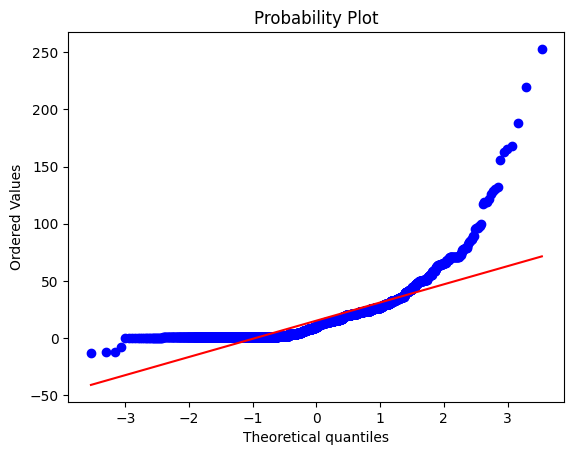

In [ ]:
stats.probplot(df_norm['Passageiros'], dist="norm", plot=plt);
#quanto mais próximo da linha vermelha maior a probabilidade de ser uma distribuição normal
#the closer to the red line the more likely it is to be a normal distribution

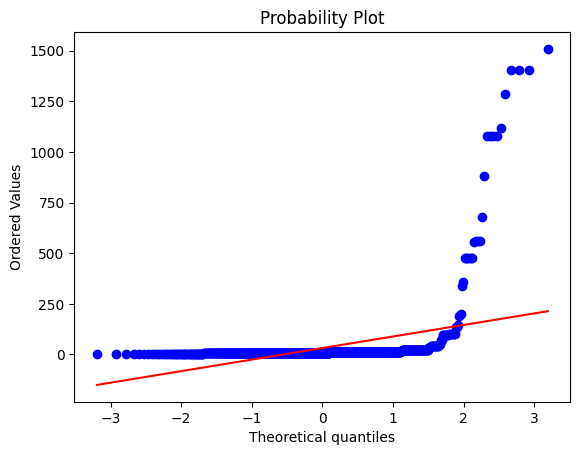

In [ ]:
stats.probplot(df_norm2['KM Estimada'], dist="norm", plot=plt);

Checando numericamente /
Checking numerically

In [ ]:
# p > 0.05 / p should be greater than 0.05 / tem que ser maior que 0.05
# p is the second number/segundo número
stats.shapiro(df_norm['Passageiros'])

ShapiroResult(statistic=0.7207565307617188, pvalue=0.0)

In [ ]:
stats.shapiro(df_norm2['KM Estimada'])

ShapiroResult(statistic=0.16718262434005737, pvalue=0.0)

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
statsmodels.stats.diagnostic.lilliefors(df_norm['Passageiros'], dist = 'norm')

(0.21750160365891155, 0.0009999999999998899)

In [ ]:
statsmodels.stats.diagnostic.lilliefors(df_norm2['KM Estimada'], dist = 'norm')

(0.4651376538374292, 0.0009999999999998899)

não é distribuição normal / it is not normal distribuition

# Teste Z / Z test

In [ ]:
df.head()

,Nº RQT,Compartilhada,Cod. Gestora,Gestora,Fonte Recurso,Sigla Departamento,Tipo,Origem,Destino,Data Saída,...,Data Retorno,Hora Retorno,KM Estimada,KM Real,Tipo Transporte,Veículo,Ano Veículo,Custo Estimado,Custo Real,Passageiros
0,4158,Não,1000,REITORIA,Recurso da União,CCS,1,Coordenadoria de Comunicação Social,Edificio Fabio Ribeiro Gomes,20/09/2016,...,20/09/2016,11:30,10.0,19,Carga,158,2006,"36,98","32,47",NaN
1,5061,Não,1000,REITORIA,Recurso da União,CCS,1,Departamento de Geografia,Sistema de Rádio e Televisão,04/11/2016,...,04/11/2016,11:00,8.0,3,Carga,173,2009,"15,98","9,76",NaN
2,900,Não,1000,REITORIA,Recurso da União,CCS,1,Sistema de Rádio e Televisão,Campus Viçosa,01/01/2016,...,29/02/2016,23:00,10.0,252,Passageiro,PARATI /725,2004,"9,43","237,38",NaN
3,901,Não,1000,REITORIA,Recurso da União,CCS,1,Sistema de Rádio e Televisão,Campus Viçosa,01/01/2016,...,29/02/2016,23:00,10.0,542,Passageiro,746,2008,"9,43","510,56",NaN
4,355,Não,1000,REITORIA,Recurso da União,CCS,1,Viçosa,Coordenadoria de Comunicação Social,01/03/2016,...,30/04/2016,23:00,10.0,631,Passageiro,PARATI /725,2004,"9,43","594,4",NaN


In [ ]:
#Descobrindo uma amostra normalizada / Discovering a normalized sample
max = -1
max_s = ''
max_len = 0
for i in df['Veículo'].value_counts().index:
  df_z = df[df['Veículo'] == i]
  df_z = df_z[df_z['Passageiros'].notna()]
  if len(df_z) > 30:
    statsv = stats.shapiro(df_z['Passageiros'])[1]
    if statsv > max and statsv != 1:
      max = statsv
      max_s = i
      max_len = len(df_z)
max, max_s, max_len

(0.10252568125724792, '163', 96)

In [ ]:
df_z = df[df['Veículo'] == '163']
df_z = df_z[df_z['Passageiros'].notna()]
df_z['Passageiros']

442     22.0
1036    16.0
2537    10.0
2545    24.0
2574     2.0
        ... 
6396    25.0
6401    40.0
6402    20.0
6403    40.0
6446    18.0
Name: Passageiros, Length: 96, dtype: float64

In [ ]:
stats.anderson(df_z.Passageiros, 'norm')

AndersonResult(statistic=0.6302788647546862, critical_values=array([0.554, 0.631, 0.757, 0.884, 1.051]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=20.09375, scale=9.570874815649931)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
statsmodels.stats.diagnostic.lilliefors(df_z['Passageiros'], dist = 'norm')

(0.08108220840391278, 0.14283954044669575)

p > 0.05 nos 3 testes / p > 0.05 in the 3 tests

In [ ]:
px.box(df_z, y="Passageiros")

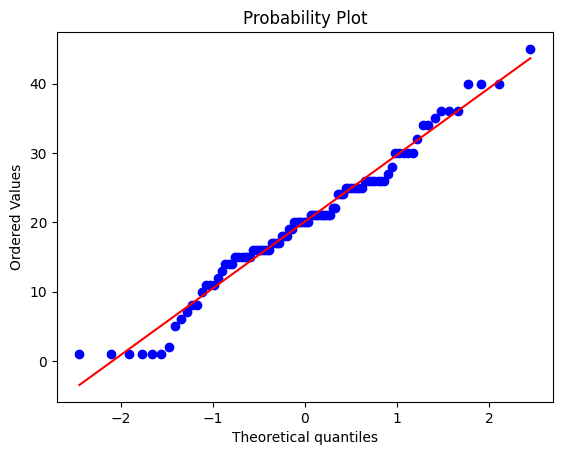

In [ ]:
stats.probplot(df_z['Passageiros'], dist="norm", plot=plt);

In [ ]:
df['Veículo'].value_counts()

Veículo
Automóvel         631
177               394
172               381
171               314
523               210
                 ... 
494                 1
493                 1
MOTOCICLETA /4      1
PARATI /701         1
187                 1
Name: count, Length: 156, dtype: int64

In [ ]:
df_177 = df[df['Veículo'] == '177']

In [ ]:
df_177['Passageiros'].describe()

count    332.000000
mean      26.274096
std       23.653724
min        0.000000
25%       18.000000
50%       21.000000
75%       27.000000
max      253.000000
Name: Passageiros, dtype: float64

In [ ]:
df_z['Passageiros'].describe()

count    96.000000
mean     20.093750
std       9.570875
min       1.000000
25%      15.000000
50%      20.000000
75%      26.000000
max      45.000000
Name: Passageiros, dtype: float64

H0 = Média de passageiros do veículo 176 >= Média de passageiros do veículo 177 = p > 0.05<br/>
H1 = Média de passageiros do veículo 176 < Média de passageiros do veículo 177 = p <= 0.05 <br/>

H0 = Average number of passengers in vehicle 176 >= Average number of passengers in vehicle 177 = p > 0.05<br/>
H1 = Average number of passengers in vehicle 176 < Average number of passengers in vehicle 177 = p <= 0.05 <br/>

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
stat, p = ztest(df_z['Passageiros'], value=26.274096 )
p

2.4999846883375885e-10

Eu acho que fiz certo / I think i did right <br/>
A hipótese alternativa está certa / H1 is right

# Teste T / T test

Número de amostras deve ser menor que 30 / Number of samples must be less than 30

In [ ]:
df.head(5)

,Nº RQT,Compartilhada,Cod. Gestora,Gestora,Fonte Recurso,Sigla Departamento,Tipo,Origem,Destino,Data Saída,...,Data Retorno,Hora Retorno,KM Estimada,KM Real,Tipo Transporte,Veículo,Ano Veículo,Custo Estimado,Custo Real,Passageiros
0,4158,Não,1000,REITORIA,Recurso da União,CCS,1,Coordenadoria de Comunicação Social,Edificio Fabio Ribeiro Gomes,20/09/2016,...,20/09/2016,11:30,10.0,19,Carga,158,2006,"36,98","32,47",NaN
1,5061,Não,1000,REITORIA,Recurso da União,CCS,1,Departamento de Geografia,Sistema de Rádio e Televisão,04/11/2016,...,04/11/2016,11:00,8.0,3,Carga,173,2009,"15,98","9,76",NaN
2,900,Não,1000,REITORIA,Recurso da União,CCS,1,Sistema de Rádio e Televisão,Campus Viçosa,01/01/2016,...,29/02/2016,23:00,10.0,252,Passageiro,PARATI /725,2004,"9,43","237,38",NaN
3,901,Não,1000,REITORIA,Recurso da União,CCS,1,Sistema de Rádio e Televisão,Campus Viçosa,01/01/2016,...,29/02/2016,23:00,10.0,542,Passageiro,746,2008,"9,43","510,56",NaN
4,355,Não,1000,REITORIA,Recurso da União,CCS,1,Viçosa,Coordenadoria de Comunicação Social,01/03/2016,...,30/04/2016,23:00,10.0,631,Passageiro,PARATI /725,2004,"9,43","594,4",NaN


In [ ]:
#Descobrindo uma amostra normalizada / Discovering a normalized sample
max = -1
max_s = ''
max_len = 0
for i in df['Ano Veículo'].value_counts().index:
  df_t = df[df['Ano Veículo'] == i]
  df_t = df_t[df_t['KM Estimada'].notna()]
  if len(df_t) >= 5 and len(df_t) < 30:
    statsv = stats.shapiro(df_t['KM Estimada'])[1]
    if statsv > max and statsv != 1:
      max = statsv
      max_s = i
      max_len = len(df_t)
max, max_s, max_len

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


(0.1575634628534317, 1988, 7)

In [ ]:
df_t = df[df['Ano Veículo'] == 1988]
df_t = df_t[df_t['KM Estimada'].notna()]

In [ ]:
statsmodels.stats.diagnostic.lilliefors(df_t['KM Estimada'], dist = 'norm')

(0.2444408915701406, 0.2420601956448047)

In [ ]:
stats.anderson(df_t['KM Estimada'], 'norm')

AndersonResult(statistic=0.4589625030445674, critical_values=array([0.543, 0.618, 0.742, 0.865, 1.029]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=6.857142857142857, scale=5.398412465054624)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

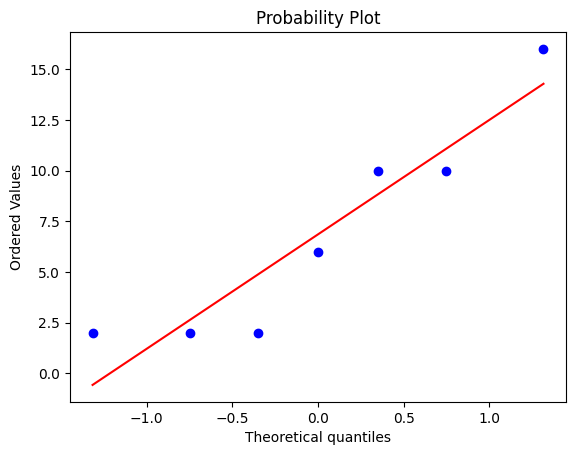

In [ ]:
stats.probplot(df_t['KM Estimada'], dist="norm", plot=plt);

In [ ]:
df_t.describe()

,Nº RQT,Cod. Gestora,Tipo,KM Estimada,KM Real,Ano Veículo,Passageiros
count,7.000000,7.0,7.0,7.000000,7.000000,7.0,2.000000
mean,2564.142857,2002.0,1.0,6.857143,850.000000,1988.0,0.500000
std,1888.941893,0.0,0.0,5.398412,422.593185,0.0,0.707107
min,310.000000,2002.0,1.0,2.000000,422.000000,1988.0,0.000000
25%,1276.000000,2002.0,1.0,2.000000,520.500000,1988.0,0.250000
50%,1463.000000,2002.0,1.0,6.000000,708.000000,1988.0,0.500000
75%,4540.000000,2002.0,1.0,10.000000,1111.000000,1988.0,0.750000
max,4544.000000,2002.0,1.0,16.000000,1557.000000,1988.0,1.000000


In [ ]:
df['Ano Veículo'].value_counts()

Ano Veículo
2012    2119
2009    1328
0        881
2013     473
2011     445
2007     319
2006     312
2010     159
1998     127
2004     126
1995     115
2001      98
1978      67
2008      63
2005      59
2016      47
1991      41
1999      34
2000      29
2002      28
1987      21
1997      18
1982      15
1996      10
1988       8
1986       8
1979       7
2014       3
1984       2
1990       1
Name: count, dtype: int64

In [ ]:
df_1999 = df[df['Ano Veículo'] == 1999]
df_1999['KM Estimada'].describe()

count    33.000000
mean      8.969697
std       2.351660
min       2.000000
25%      10.000000
50%      10.000000
75%      10.000000
max      10.000000
Name: KM Estimada, dtype: float64

In [ ]:
df_t['KM Estimada'].describe()

count     7.000000
mean      6.857143
std       5.398412
min       2.000000
25%       2.000000
50%       6.000000
75%      10.000000
max      16.000000
Name: KM Estimada, dtype: float64

H0 = df_t['KM Estimada'] >= df_1999['KM Estimada'] = p > 0.05 <br/>
H1 = df_t['KM Estimada'] < df_1999['KM Estimada'] = p <= 0.05

In [ ]:
stat, p = stats.ttest_1samp(df_t['KM Estimada'], popmean=8.969697)

In [ ]:
p

0.3404156634762102

Eu acho que fiz certo² / I think i did right² <br/>
A hipótese nula está certa / H0 is right

# Correção linear / Linear correction

A correção linear refere-se a um processo ou ajuste que é feito de forma linear, ou seja, seguindo uma relação linear entre variáveis. <br/>
Linear correction refers to a process or adjustment that is done linearly, meaning following a linear relationship between variables.
<br/>
Credits: ChatGPT

In [ ]:
df.columns

Index(['Nº RQT', 'Compartilhada', 'Cod. Gestora', 'Gestora', 'Fonte Recurso',
       'Sigla Departamento', 'Tipo', 'Origem', 'Destino', 'Data Saída',
       'Hora Saída', 'Data Retorno', 'Hora Retorno', 'KM Estimada', 'KM Real',
       'Tipo Transporte', 'Veículo', 'Ano Veículo', 'Custo Estimado',
       'Custo Real', 'Passageiros'],
      dtype='object')

In [ ]:
df_lc = df[['KM Estimada', 'KM Real', 'Ano Veículo', 'Custo Estimado', 'Custo Real', 'Passageiros']]

In [ ]:
df_lc.dtypes

KM Estimada       float64
KM Real             int64
Ano Veículo         int64
Custo Estimado     object
Custo Real         object
Passageiros       float64
dtype: object

In [ ]:
#df_lc['Custo Real'] = df_lc['Custo Real'].str.replace(',', '.').astype(float);
#df_lc['Custo Estimado'] = df_lc['Custo Estimado'].str.replace(',', '.').astype(float);

<ipython-input-25-c788fa15cafd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lc['Custo Estimado'] = df_lc['Custo Estimado'].str.replace(',', '.').astype(float);


In [ ]:
df_lc.dtypes

KM Estimada       float64
KM Real             int64
Ano Veículo         int64
Custo Estimado    float64
Custo Real        float64
Passageiros       float64
dtype: object

In [ ]:
df_lc.head()

,KM Estimada,KM Real,Ano Veículo,Custo Estimado,Custo Real,Passageiros
0,10.0,19,2006,36.98,32.47,NaN
1,8.0,3,2009,15.98,9.76,NaN
2,10.0,252,2004,9.43,237.38,NaN
3,10.0,542,2008,9.43,510.56,NaN
4,10.0,631,2004,9.43,594.40,NaN


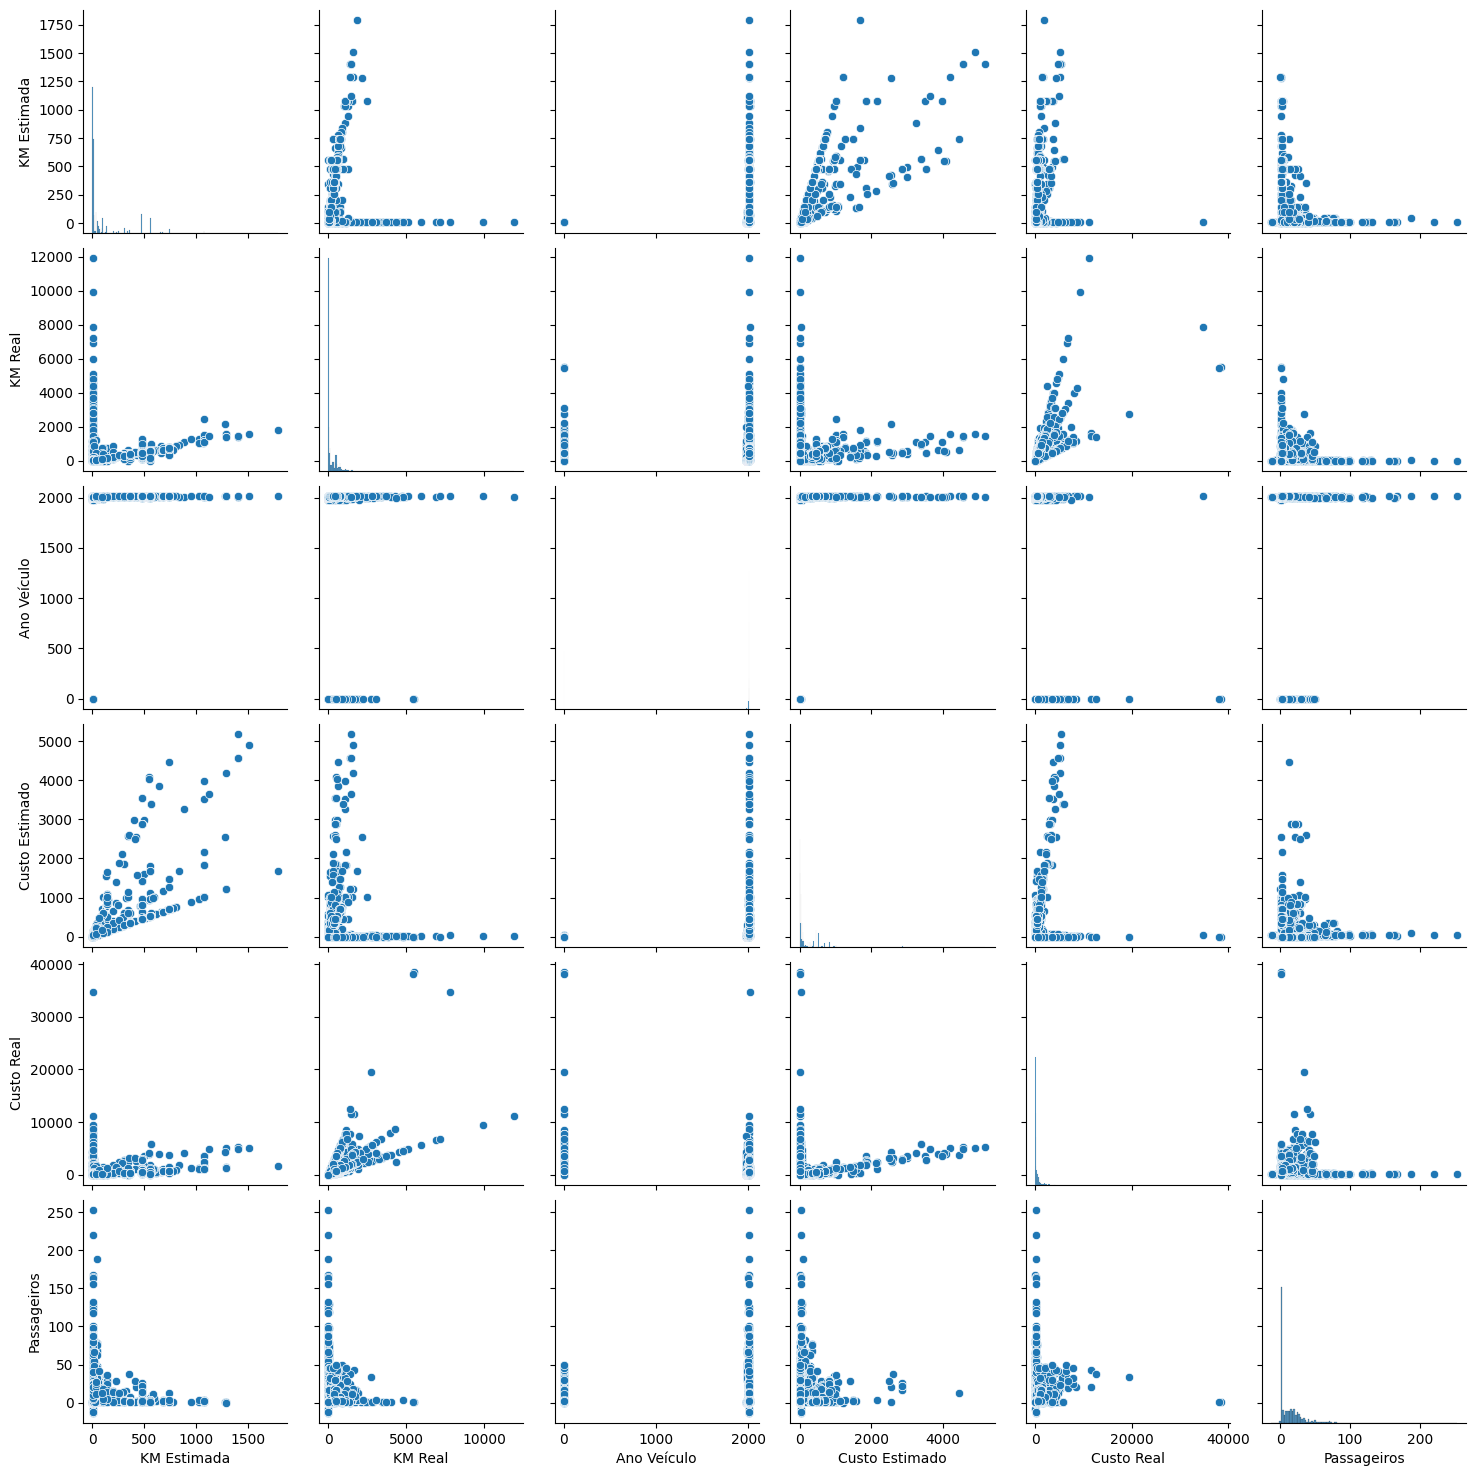

In [ ]:
sns.pairplot(df_lc)

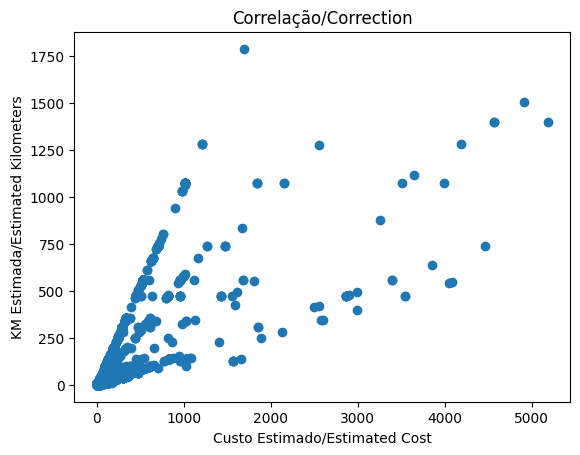

In [ ]:
plt.scatter(df_lc['Custo Estimado'],df_lc['KM Estimada'])
plt.title('Correlação/Correction')
plt.xlabel('Custo Estimado/Estimated Cost')
plt.ylabel('KM Estimada/Estimated Kilometers')
plt.grid(False)
plt.show()

In [ ]:
df_lc.corr(method='spearman')
#O método de Spearman pode ser usado em dataframes denormalizados (teste não parametrizado)
#The Spearman method can be used on denormalized dataframes (nonparametric test).

,KM Estimada,KM Real,Ano Veículo,Custo Estimado,Custo Real,Passageiros
KM Estimada,1.000000,0.585595,0.241441,0.784959,0.495043,-0.299003
KM Real,0.585595,1.000000,-0.181479,0.021316,0.904237,-0.459778
Ano Veículo,0.241441,-0.181479,1.000000,0.454582,-0.240593,-0.004753
Custo Estimado,0.784959,0.021316,0.454582,1.000000,0.093518,0.280774
Custo Real,0.495043,0.904237,-0.240593,0.093518,1.000000,-0.139332
Passageiros,-0.299003,-0.459778,-0.004753,0.280774,-0.139332,1.000000


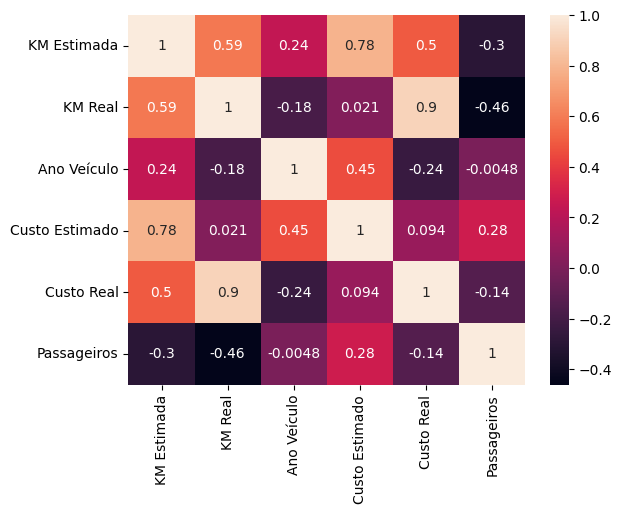

In [ ]:
plt.figure()
sns.heatmap(df_lc.corr(method='spearman'), annot=True);

# Regressão Linear / Linear Regression

In [ ]:
df.columns

Index(['Nº RQT', 'Compartilhada', 'Cod. Gestora', 'Gestora', 'Fonte Recurso',
       'Sigla Departamento', 'Tipo', 'Origem', 'Destino', 'Data Saída',
       'Hora Saída', 'Data Retorno', 'Hora Retorno', 'KM Estimada', 'KM Real',
       'Tipo Transporte', 'Veículo', 'Ano Veículo', 'Custo Estimado',
       'Custo Real', 'Passageiros'],
      dtype='object')

In [ ]:
#Descobrindo uma amostra normalizada / Discovering a normalized sample
max = -1
max_s = ''
max_len = 0
for i in df['Veículo'].value_counts().index:
  df_r = df[df['Veículo'] == i]
  df_r = df_r[df_r['KM Real'].notna()]
  if len(df_r) >= 20:
    statsv = stats.shapiro(df_r['KM Real'])[1]
    if statsv > max and statsv != 1:
      max = statsv
      max_s = i
      max_len = len(df_r)
max, max_s, max_len

(0.29478344321250916, '790', 55)

In [ ]:
df_790 = df[df['Veículo'] == '790']

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [ ]:
df_790 = df_790.rename(columns={'KM Real': 'KM_Real', 'Custo Real': 'Custo_Real'})

In [ ]:
r = smf.ols('KM_Real ~ Custo_Real', data = df_790).fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                KM_Real   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.887e+10
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          3.37e-233
Time:                        20:33:58   Log-Likelihood:                 176.85
No. Observations:                  55   AIC:                            -349.7
Df Residuals:                      53   BIC:                            -345.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0030      0.003     -0.963      0.3

In [ ]:
c = pd.DataFrame(r.params)
c.columns = ['C']
print(c)

                   C
Intercept  -0.002973
Custo_Real  1.061580


KM_Real = -0.002973 + 1.061580*Custo_Real

In [ ]:
df_790['KM_Real'].head(10)

84     723
90     288
92     695
94     684
96     510
97     711
99     618
100    897
101    713
102    788
Name: KM_Real, dtype: int64

In [ ]:
r.predict()

array([ 722.93274823,  288.00357791,  695.00258842,  684.00462356,
        510.00110805,  711.0005933 ,  618.00621859,  896.99995852,
        713.00697878,  788.00757893,  565.00154816,  731.99863818,
         33.00153739,   13.99926219,  575.00162818, 1122.00175898,
        556.99723782,  240.99683234,  480.99875283,  135.99599212,
        234.00102264,  478.0050983 ,  266.99491723,  385.00010779,
        104.99786722,  103.99998237,  546.9971578 ,  300.99731246,
        184.00062254,  544.00350327,  680.00246839,  328.00389799,
        538.00557842,  538.00557842,  530.00126809,  654.0043835 ,
        469.00290312,  558.00573846,   43.99950225,  430.99835273,
        564.00366332,  271.99495724,  653.00649866,  468.00501828,
        335.99759253,  480.99875283,  541.99711779,  479.00298314,
        259.99910753,  299.00154277,  703.00689876,  540.00134811,
        335.99759253,  716.99851815,  354.00198289])

In [ ]:
resid = r.resid
resid

84      0.067252
90     -0.003578
92     -0.002588
94     -0.004624
96     -0.001108
97     -0.000593
99     -0.006219
100     0.000041
101    -0.006979
102    -0.007579
103    -0.001548
112     0.001362
2594   -0.001537
2595    0.000738
2639   -0.001628
2654   -0.001759
2679    0.002762
2700    0.003168
2707    0.001247
2788    0.004008
2791   -0.001023
3004   -0.005098
3005    0.005083
3334   -0.000108
3489    0.002133
3505    0.000018
3644    0.002842
3672    0.002688
3673   -0.000623
4817   -0.003503
4931   -0.002468
4950   -0.003898
4964   -0.005578
4965   -0.005578
4974   -0.001268
5078   -0.004383
5677   -0.002903
5770   -0.005738
5804    0.000498
5834    0.001647
5864   -0.003663
5901    0.005043
5905   -0.006499
6164   -0.005018
6166    0.002407
6167    0.001247
6178    0.002882
6182   -0.002983
6198    0.000892
6216   -0.001543
6418   -0.006899
6432   -0.001348
6433    0.002407
6458    0.001482
6492   -0.001983
dtype: float64

In [ ]:
#max(df_790['Custo_Real'])

df_790['Custo_Real']

84       681.00
90       271.30
92       654.69
94       644.33
96       480.42
97       669.76
99       582.16
100      844.97
101      671.65
102      742.30
103      532.23
112      689.54
2594      31.09
2595      13.19
2639     541.65
2654    1056.92
2679     524.69
2700     227.02
2707     453.10
2788     128.11
2791     220.43
3004     450.28
3005     251.51
3334     362.67
3489      98.91
3505      97.97
3644     515.27
3672     283.54
3673     173.33
4817     512.45
4931     640.56
4950     308.98
4964     506.80
4965     506.80
4974     499.26
5078     616.07
5677     441.80
5770     525.64
5804      41.45
5834     406.00
5864     531.29
5901     256.22
5905     615.13
6164     440.86
6166     316.51
6167     453.10
6178     510.56
6182     451.22
6198     244.92
6216     281.66
6418     662.23
6432     508.68
6433     316.51
6458     675.41
6492     333.47
Name: Custo_Real, dtype: float64

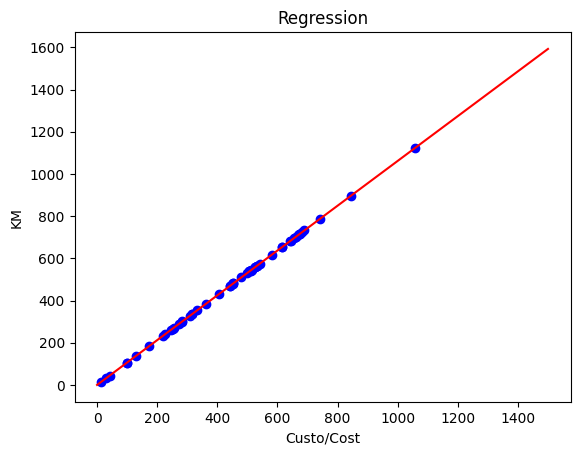

In [ ]:
plt.scatter(y=df_790.KM_Real, x=df_790.Custo_Real, color='blue')
#X_plot = np.linspace(min(df_790['Custo_Real']), max(df_790['Custo_Real']), len(df_790))
X_plot = np.linspace(0, 1500)
plt.plot(X_plot, X_plot*r.params[1] + r.params[0], color='r')
plt.title('Regression')
plt.ylabel('KM')
plt.xlabel('Custo/Cost')
plt.show()

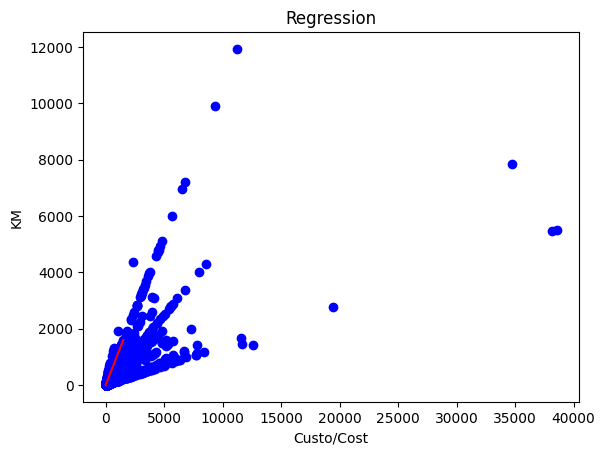

In [ ]:
plt.scatter(y=df['KM Real'], x=df['Custo Real'], color='blue')
#X_plot = np.linspace(min(df_790['Custo_Real']), max(df_790['Custo_Real']), len(df_790))
X_plot = np.linspace(0, 1500)
plt.plot(X_plot, X_plot*r.params[1] + r.params[0], color='r')
plt.title('Regression')
plt.ylabel('KM')
plt.xlabel('Custo/Cost')
plt.show()

In [ ]:
stats.shapiro(resid)

ShapiroResult(statistic=0.4020180106163025, pvalue=1.2652078278281575e-13)

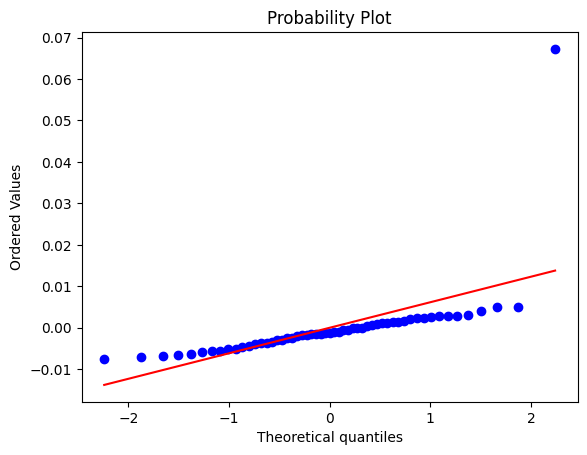

In [ ]:
stats.probplot(resid, dist="norm", plot=plt)
plt.show()

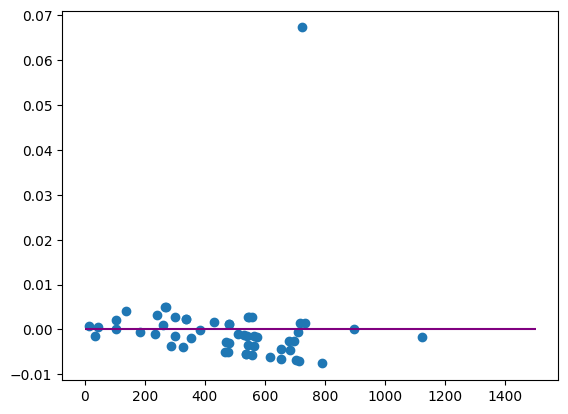

In [ ]:
plt.scatter(y=resid, x=r.predict())
plt.hlines(y=0, xmin=0, xmax=1500, color = 'purple')
plt.show()

## ScikitLearn

In [ ]:
#Descobrindo uma amostra normalizada / Discovering a normalized sample
max = -1
max_s = ''
max_len = 0
for i in df['Veículo'].value_counts().index:
  df_r2 = df[df['Veículo'] == i]
  df_r2 = df_r2[df_r2['KM Real'].notna()]
  if len(df_r2) >= 20 and i != '790':
    statsv = stats.shapiro(df_r2['KM Real'])[1]
    if statsv > max and statsv != 1:
      max = statsv
      max_s = i
      max_len = len(df_r2)
max, max_s, max_len

(0.06749387830495834, '792', 35)

In [ ]:
df_r2 = df[df['Veículo'] == '792']
df_r2 = df_r2[df_r2['KM Real'].notna()]

In [ ]:
len(df_r2)

35

In [ ]:
x = df_r2['KM Real']
y = df_r2['Custo Real']

In [ ]:
c2 = np.corrcoef(x, y)

In [ ]:
x = x.to_numpy().reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
r2 = LinearRegression()
r2.fit(x,y)

LinearRegression()

In [ ]:
print(f'{r2.intercept_} + {r2.coef_}*[KM Real]')

-0.00046535377117606913 + [0.94200035]*[KM Real]


In [ ]:
df_r2['Custo Real'].head()

42    519.04
43    587.81
49    519.98
52    457.81
53    536.94
Name: Custo Real, dtype: float64

In [ ]:
r2.predict(x)

array([519.04172856, 587.80775426, 519.98372892, 457.81170569,
       536.93973525, 466.28970886, 261.87563249, 528.46173208,
       555.77974229, 556.72174264, 542.59173736, 450.27570287,
       623.60376763, 471.94171097, 261.87563249, 673.52978628,
       450.27570287, 730.0498074 , 491.72371836, 487.95571695,
       208.18161242, 448.39170217, 478.53571343, 463.4637078 ,
       667.87778417, 682.9497898 , 434.26169689, 220.427617  ,
       433.31969654, 434.26169689, 453.10170393, 997.57790735,
       302.38164762, 119.63357934, 309.91765043])

In [ ]:
# coeficiente de determinação
r2.score(x,y)

0.9999999997432404

In [ ]:
r2.predict([[436.3]])

array([410.9942882])

# Amostras Independetes / Independent Samples

In [ ]:
#Descobrindo uma amostra normalizada / Discovering a normalized sample
max = -1
max_s = ''
max_len = 0
for i in df['Ano Veículo'].value_counts().index:
  df_t = df[df['Ano Veículo'] == i]
  df_t = df_t[df_t['KM Real'].notna()]
  if len(df_t) >= 5 and len(df_t) < 30:
    statsv = stats.shapiro(df_t['KM Real'])[1]
    if statsv > max and statsv != 1:
      max = statsv
      max_s = i
      max_len = len(df_t)
max, max_s, max_len

(0.0390782468020916, 1979, 7)

In [ ]:
df_t = df[df['Ano Veículo'] == 1988]
df_t = df_t[df_t['KM Real'].notna()]

In [ ]:
df_t2 = df[df['Ano Veículo'] == 1997]
df_t2 = df_t2[df_t2['KM Real'].notna()]

Ho = Média igual = p > 0.05<br/>
Ha = Média diferente = p <= 0.05<br/><br/>
Ho = Mean equal = p > 0.05<br/>
Ha = Different mean = p <= 0.05

In [ ]:
stat, p = stats.ttest_ind(df_t['KM Real'], df_t2['KM Real'], equal_var=True)

In [ ]:
p

0.09582198199343836

In [ ]:
df_t['KM Real'].describe(), df_t2['KM Real'].describe()

(count       8.000000
 mean      783.875000
 std       433.650761
 min       321.000000
 25%       441.500000
 50%       650.500000
 75%      1087.500000
 max      1557.000000
 Name: KM Real, dtype: float64,
 count      18.000000
 mean      509.277778
 std       344.594528
 min         5.000000
 25%       367.750000
 50%       457.000000
 75%       835.500000
 max      1061.000000
 Name: KM Real, dtype: float64)

## Mann Whitney

Teste não paramétrico / Nonparametric teste

In [ ]:
df['Veículo'].value_counts()

Veículo
Automóvel         631
177               394
172               381
171               314
523               210
                 ... 
494                 1
493                 1
MOTOCICLETA /4      1
PARATI /701         1
187                 1
Name: count, Length: 156, dtype: int64

In [ ]:
df_m = df[df['Veículo'] == '172']
df_m = df_m[df_m['KM Real'].notna()]

In [ ]:
df_m2 = df[df['Veículo'] == '171']
df_m2 = df_m2[df_m2['KM Real'].notna()]

Ho = Mediana igual = p > 0.05<br/>
Ha = Mediana diferente = p <= 0.05<br/><br/>
Ho = Median equal = p > 0.05<br/>
Ha = Different median = p <= 0.05

In [ ]:
stat, p = stats.mannwhitneyu(df_m['KM Real'], df_m2['KM Real'])

In [ ]:
p

7.927336234594021e-11

In [ ]:
df_m['KM Real'].describe()

count    381.000000
mean      28.627297
std       75.382796
min        1.000000
25%       11.000000
50%       15.000000
75%       26.000000
max      975.000000
Name: KM Real, dtype: float64

In [ ]:
df_m2['KM Real'].describe()

count    314.000000
mean      15.961783
std       28.295539
min        2.000000
25%        9.000000
50%       12.000000
75%       15.000000
max      444.000000
Name: KM Real, dtype: float64

In [ ]:
stat, p = stats.mannwhitneyu(df_t['KM Real'], df_t2['KM Real'])

In [ ]:
p

0.17340505499039371

# Amostras Dependentes / Dependent Samples

In [ ]:
df_t2 = df[df['Ano Veículo'] == 1997]
df_t2 = df_t2[df_t2['KM Real'].notna()]

In [ ]:
df_t2['KM Estimada']

197     20.0
198     20.0
262     10.0
296     10.0
330     10.0
1095    20.0
1321     8.0
1871     4.0
2950    20.0
2977    10.0
3060    10.0
3089    10.0
3130    10.0
3163    10.0
3197    10.0
3226    10.0
3250    10.0
3274    10.0
Name: KM Estimada, dtype: float64

In [ ]:
stat, p = stats.ttest_rel(df_t2['KM Real'], df_t2['KM Estimada'])
p
#H1 is right

1.1226574865508415e-05

In [ ]:
df_t2['KM Real'].mean(), df_t2['KM Estimada'].mean()

(509.27777777777777, 11.777777777777779)

In [ ]:
stat, p = stats.wilcoxon(df_t2['KM Real'], df_t2['KM Estimada']) # non parametric

In [ ]:
p

2.288818359375e-05

In [ ]:
df_t2['KM Real'].median(), df_t2['KM Estimada'].median()

(457.0, 10.0)

# Plotly
https://plotly.com/python/

In [ ]:
df.dtypes

Nº RQT                  int64
Compartilhada          object
Cod. Gestora            int64
Gestora                object
Fonte Recurso          object
Sigla Departamento     object
Tipo                    int64
Origem                 object
Destino                object
Data Saída             object
Hora Saída             object
Data Retorno           object
Hora Retorno           object
KM Estimada           float64
KM Real                 int64
Tipo Transporte        object
Veículo                object
Ano Veículo             int64
Custo Estimado        float64
Custo Real            float64
Passageiros           float64
dtype: object

In [ ]:
df['Data Retorno'] = pd.to_datetime(df['Data Retorno'])

<ipython-input-46-f0acf77cf9df>:1: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [ ]:
df.dtypes

Nº RQT                         int64
Compartilhada                 object
Cod. Gestora                   int64
Gestora                       object
Fonte Recurso                 object
Sigla Departamento            object
Tipo                           int64
Origem                        object
Destino                       object
Data Saída                    object
Hora Saída                    object
Data Retorno          datetime64[ns]
Hora Retorno                  object
KM Estimada                  float64
KM Real                        int64
Tipo Transporte               object
Veículo                       object
Ano Veículo                    int64
Custo Estimado               float64
Custo Real                   float64
Passageiros                  float64
dtype: object

In [ ]:
df['Data Retorno']

0      2016-09-20
1      2016-11-04
2      2016-02-29
3      2016-02-29
4      2016-04-30
          ...    
6958          NaT
6959          NaT
6960          NaT
6961          NaT
6962          NaT
Name: Data Retorno, Length: 6963, dtype: datetime64[ns]

In [ ]:
df['m_r'] = df['Data Retorno'].dt.month

In [ ]:
df['a_r'] = df['Data Retorno'].dt.year

In [ ]:
data = df[df['a_r'] == 2016]
data = data.groupby('m_r').size().reset_index(name='count')
data['m_r'] = data['m_r'].astype('str')
fig = px.bar(data, x='m_r', y='count', title = 'Contagem por Mês de Retorno / Count by Return Month' )
fig.update_xaxes(title_text="Month")
fig.update_yaxes(title_text="Count")
fig.show()

In [ ]:
test = df[df['a_r'] == 2016]
test['m_r'].value_counts()

m_r
9.0     399
10.0    399
11.0    322
8.0     297
3.0     160
12.0    117
7.0      83
4.0      79
2.0      54
6.0      29
5.0      26
Name: count, dtype: int64

In [ ]:
df.columns

Index(['Nº RQT', 'Compartilhada', 'Cod. Gestora', 'Gestora', 'Fonte Recurso',
       'Sigla Departamento', 'Tipo', 'Origem', 'Destino', 'Data Saída',
       'Hora Saída', 'Data Retorno', 'Hora Retorno', 'KM Estimada', 'KM Real',
       'Tipo Transporte', 'Veículo', 'Ano Veículo', 'Custo Estimado',
       'Custo Real', 'Passageiros', 'm_r', 'a_r'],
      dtype='object')

In [ ]:
data = df.groupby('Tipo Transporte').size().reset_index(name='Count')
fig = px.pie(data, values='Count', names='Tipo Transporte', title='Contagem e % por Tipo de Transporte / Count and % by Type of Transport')
fig.update_traces(textposition='inside', textinfo='label+value+percent')
fig

In [ ]:
df.columns

Index(['Nº RQT', 'Compartilhada', 'Cod. Gestora', 'Gestora', 'Fonte Recurso',
       'Sigla Departamento', 'Tipo', 'Origem', 'Destino', 'Data Saída',
       'Hora Saída', 'Data Retorno', 'Hora Retorno', 'KM Estimada', 'KM Real',
       'Tipo Transporte', 'Veículo', 'Ano Veículo', 'Custo Estimado',
       'Custo Real', 'Passageiros', 'm_r', 'a_r'],
      dtype='object')

In [ ]:
data = df
data['Passageiros'].fillna(0, inplace=True)
data['Passageiros'] = data['Passageiros'].apply(lambda x: 0 if x < 0 else x)
data = data[data['a_r'] == 2016]
data = data[data['m_r'] > 8.0]

In [ ]:
data.dtypes

Nº RQT                         int64
Compartilhada                 object
Cod. Gestora                   int64
Gestora                       object
Fonte Recurso                 object
Sigla Departamento            object
Tipo                           int64
Origem                        object
Destino                       object
Data Saída                    object
Hora Saída                    object
Data Retorno          datetime64[ns]
Hora Retorno                  object
KM Estimada                  float64
KM Real                        int64
Tipo Transporte               object
Veículo                       object
Ano Veículo                    int64
Custo Estimado               float64
Custo Real                   float64
Passageiros                  float64
m_r                          float64
a_r                          float64
dtype: object

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
fig = px.scatter(data, x="KM Real", y="Custo Real",
	         size="Passageiros", color="Tipo Transporte",
                 hover_name="Sigla Departamento", log_x=True, size_max=42)
fig

In [ ]:
data = df.groupby("Sigla Departamento")["KM Real"].mean().to_frame().reset_index()
data.columns = ['Sigla Departamento', 'KM Real']
data

,Sigla Departamento,KM Real
0,AIN,481.000000
1,BBT,8.000000
2,CCA,437.500000
3,CCB,281.607143
4,CCE,184.615385
...,...,...
84,RTR,546.626984
85,RTV,1273.000000
86,SOC,11.214286
87,col,572.000000


In [ ]:
data = data.sort_values(by='KM Real', ascending=False)

In [ ]:
px.funnel(data, y='Sigla Departamento', x='KM Real', title = 'Média de KM por Departamento / Average KM by Department')